In [1]:
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

import numpy as np
import requests
import gmaps
import os
import time
from scipy.stats import linregress
import json

from api_keys import g_key

output_data_file = "Cities.csv"

#11/2012 - 9/

In [2]:
def format_func(name):
    convert = name[['RegionName','2012-11','2012-12','2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2016-11','2016-12','2017-01','2017-02', '2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09']]
    index_convert = convert.set_index('RegionName')
    # code below will be used to adjust for inflation according to the yearly rates. Ideally will be replaced with CPI function
    #name['RegionName','2012-11','2012-12'] = (name[['RegionName','2012-11','2012-12']]*.02)
    #name['2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11'] = name[['2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11']]
    #name['2016-11','2016-12'] = name[['2016-11','2016-12']
    #name['2017-01','2017-02','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09'] = [['2017-01','2017-02','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09']]
    #name.to_csv()
    return index_convert



In [3]:
state_median_listing_price_df = pd.DataFrame(pd.read_csv('https://query.data.world/s/dnbvyqky22ypxgwpobxmtxrzabna4l'))
state_median_listing_price_df = format_func(state_median_listing_price_df)
state_median_listing_price_df

,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09
RegionName,,,,,,,,,,,,,,,,,,,,,
California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,275.493799,276.518008,282.955393,293.203844,299.057412,299.166667,297.763398,298.088075,298.440764,299.450549
Texas,85.464438,85.915204,86.134454,87.870159,89.198399,90.090090,91.053404,91.836735,92.137430,92.060306,...,113.636364,114.099124,115.280066,117.278973,118.768953,119.565217,119.937888,119.606330,119.264947,119.360676
New York,170.822785,175.264550,176.823176,178.741259,180.565342,176.144549,172.938631,166.906044,162.971588,160.060976,...,168.870390,173.333333,180.343137,184.251090,184.568049,181.332454,177.933673,176.666667,173.951049,176.753081
Florida,104.588883,106.130573,108.095672,109.306409,111.162150,112.791501,112.961211,113.785835,113.888889,113.636364,...,149.525605,153.688525,155.466399,155.922242,157.351489,157.372009,157.127282,157.071606,157.093849,157.841623
Illinois,101.441103,99.206349,99.818402,102.056962,104.707792,107.563792,110.030030,111.586258,110.418416,109.957239,...,124.274972,123.982219,128.113553,132.468997,135.254149,137.603432,138.651094,137.694224,135.787421,135.036496
Pennsylvania,105.820106,104.644269,104.625122,106.901311,108.373494,109.648026,111.952862,112.580502,111.241218,109.411765,...,109.282327,109.221748,110.555556,113.696388,116.197445,118.803198,119.016818,118.623962,117.778869,117.741935
Ohio,NaN,78.225947,77.931644,78.616352,80.182927,81.417625,83.145036,83.571429,83.333333,82.661290,...,88.799106,88.857939,90.431080,93.537415,95.646438,97.857589,98.574561,98.629386,98.409091,97.989950
Michigan,78.310105,77.445384,77.617329,78.770469,81.509797,85.456247,88.973729,91.782407,92.316442,91.906806,...,108.758503,108.360100,110.049592,113.726885,117.144079,120.294311,122.150411,121.875000,121.976150,121.904896
Georgia,81.664145,81.862447,82.199494,83.745287,84.675141,85.962145,87.340248,88.206215,88.652482,88.184012,...,98.853868,98.733676,100.176744,102.772157,105.030846,106.187500,107.242166,107.740802,107.459677,107.917059


In [4]:
state_median_price_reduction_pct_df = pd.DataFrame(pd.read_csv('https://query.data.world/s/giahtzt7kepnf7hvmpplmwfidknhgi'))
state_median_price_reduction_pct_df = format_func(state_median_price_reduction_pct_df)
#state_median_price_reduction_pct_df

AttributeError: 'list' object has no attribute 'get_label'

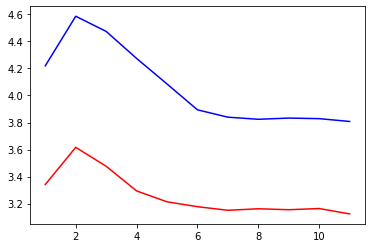

In [5]:
# Make a lingraph
st_med_reduc_line = state_median_price_reduction_pct_df.mean(axis=0)

first_elect = st_med_reduc_line.loc[['2012-11','2012-12','2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09']]
first_elect = first_elect.reset_index(drop=True)
first_elect = first_elect.values.tolist()

second_elect = st_med_reduc_line.loc[['2016-11','2016-12','2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09']]
second_elect = second_elect.reset_index(drop=True)
second_elect = second_elect.values.tolist()

periods = [1,2,3,4,5,6,7,8,9,10,11]
first_elect_line = plt.plot(periods, first_elect, color="blue", label="2012 Election")
second_elect_line = plt.plot(periods, second_elect, color="red", label="2016 Election")
plt.legend(handles=[first_elect_line, second_elect_line], loc="best")
plt.show()

#Make it look nicer, format it

In [7]:
price_reduc_change = state_median_price_reduction_pct_df
# The times 100 is so that the changes are more visible in the mapping
price_reduc_change['2012 Change'] = ((price_reduc_change['2012-11'] - price_reduc_change['2013-09']) * 100)
price_reduc_change['2016 Change'] = ((price_reduc_change['2016-11'] - price_reduc_change['2017-09']) * 100)
#list(price_reduc_change.columns)
#price_reduc_change

states_lat_lng = pd.read_csv("states.csv")
states_lat_lng = states_lat_lng.rename(columns={'name': 'RegionName'})
states_lat_lng = states_lat_lng.set_index('RegionName')

reduc_change = states_lat_lng.join(price_reduc_change, how='outer')
reduc_change_df = reduc_change.drop('Puerto Rico')
#reduc_change.head(51)


gmaps.configure(api_key=g_key)
locations = reduc_change_df[["latitude", "longitude"]].astype(float)
locations = locations.reset_index(drop=True)
percent_change = reduc_change_df['2012 Change'].astype(float)
# Can't map negative values for heat map, so made them into absolute values
percent_change = abs(percent_change)
percent_change = percent_change.reset_index(drop=True)

#how do Imake this work, I'm guessing its beacause the values are so small
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=percent_change, dissipating=False, max_intensity=75, point_radius = 2)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [8]:
reduc_change_df 
#reduc_change.head(51)

gmaps.configure(api_key=g_key)
places = reduc_change_df[["latitude", "longitude"]].astype(float)
places = places.reset_index(drop=True)
sixteen_percent_change = reduc_change_df['2016 Change'].astype(float)
# Can't map negative values for heat map, so made them into absolute values
sixteen_percent_change = abs(sixteen_percent_change)
sixteen_percent_change = sixteen_percent_change.reset_index(drop=True)
places
#how do Imake this work, I'm guessing its beacause the values are so small
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(places, weights=sixteen_percent_change, dissipating=False, max_intensity=75, point_radius = 2)
fig.add_layer(heat_layer)
fig


Figure(layout=FigureLayout(height='420px'))

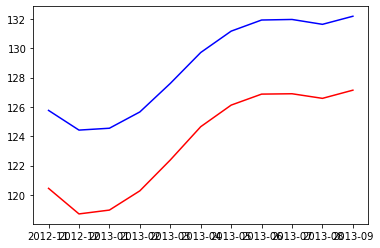

In [9]:
st_med_list = state_median_listing_price_df.mean(axis=0)
st_med_list = pd.DataFrame(st_med_list)
#st_med_list['Factor'] = (100 - st_med_list[''])
#twelve_rate = st_med_list.loc["2012 Change"]
#twelve_rate

reduc_change_mod = reduc_change_df[['2012-11','2012-12','2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09']]
avg_price_reduc_per_state = reduc_change_mod.mean()
avg_price_reduc_per_state = pd.DataFrame(avg_price_reduc_per_state)
avg_price_reduc_per_state = avg_price_reduc_per_state.rename(columns={0 :'Avg Price % Reduc'})
# Rename the column so we can mnaiuplate it better
avg_price_reduc_per_state['Factor'] = ((100 - avg_price_reduc_per_state['Avg Price % Reduc']) / 100)
factor_list = avg_price_reduc_per_state['Factor']
factor_list = pd.DataFrame(factor_list)
factor_list = factor_list.rename(columns={0 :'Avg Price % Reduc'})
factor_list = factor_list.reset_index(drop=True)
#factor_list
#st_med_list_price_line = pd.DataFrame(st_med_list_price_line)
#st_med_list

before_elect = st_med_list.loc[['2012-11','2012-12','2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09']]
before_elect = before_elect.reset_index(drop=True)
before_elect = before_elect.rename(columns={0 :'Avg List Price'})
before_elect
price_bf_af = factor_list.join(before_elect, how='outer')
before_elect = before_elect.values.tolist()
after_elect = (price_bf_af['Factor'] * price_bf_af['Avg List Price'])
after_elect = after_elect.values.tolist()
#before_elect

periods = ['2012-11','2012-12','2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09']

periods

before_elect_line = plt.plot(periods, before_elect, color="blue", label="2012 Listing Prices")
after_elect_line = plt.plot(periods, after_elect, color="red", label="2012 Listing Prices After Reduction")
#plt.legend(handles=["2012 Listing Prices","2012 Listing Prices After Reduction"], loc="best")
plt.show()


In [ ]:
second_elect = st_med_list_price_line.loc[['2016-11','2016-12','2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09']]
second_elect = second_elect.reset_index(drop=True)
second_elect = pd.DataFrame(second_elect)
second_elect

In [ ]:
reduc_change_df

In [ ]:
#state_decrease_value_pct_df = pd.DataFrame(pd.read_csv('https://query.data.world/s/3bc7jmhfh554mjv4ikivps34ejycfw'))
#format_func(state_decrease_value_pct_df)

In [ ]:
#state_increase_value_pct_df = pd.DataFrame(pd.read_csv('https://query.data.world/s/pryizs5itb2ilek6asdxvs5i5q5kea'))
#format_func(state_increase_value_pct_df)

In [ ]:
state_zhvi_summary_df = pd.DataFrame(pd.read_csv('https://query.data.world/s/2w7itycnobznpfaiwxoa4iq3q6taam'))
state_zhvi_summary_df
# NEED TO CLEAN UP THE DATA FOR THIS ONE INDIVIDUALLY

In [6]:
state_inventory_measure_ssa_df = pd.DataFrame(pd.read_csv('https://query.data.world/s/pc7wzkbuvdyv7qhlo3bpz6iyx4h2rh'))
format_func(state_inventory_measure_ssa_df)

,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09
RegionName,,,,,,,,,,,,,,,,,,,,,
California,73229,71941,71672,71196,70074,69091,67959,65773,64689,66192,...,70078,69034,67694,65779,64487,63707,61920,59521,58212,57874
Texas,115465,113937,113425,113871,114238,113710,112187,109005,106295,105592,...,93702,94559,94379,93289,92965,93981,95368,97337,99225,98995
New York,94129,92116,91787,91975,91414,89759,87201,84489,82663,81936,...,72312,72450,71051,68173,65341,63636,62329,61292,60892,60901
Florida,157648,154189,153610,156295,157978,156218,153069,148102,142431,141313,...,140942,142623,143115,142269,141031,139266,137599,136223,134331,131476
Illinois,62820,62027,61849,61635,60671,59763,58263,55715,54272,54754,...,57343,56524,55697,54703,53481,52459,51840,51634,52198,53149
Pennsylvania,65152,64745,65628,66792,67129,67197,67109,66350,65418,65185,...,56812,56688,55973,54415,52889,51811,50851,50179,49998,50111
Ohio,54020,54028,54834,55743,55599,55157,55050,54546,53519,52790,...,43052,42993,42362,41081,39569,38121,37154,36785,36711,36791
Michigan,59938,59422,59108,58972,58885,58868,58464,56593,54633,54333,...,46818,46344,45789,44631,43524,42631,41507,40517,39930,39582
Georgia,55665,54824,54850,54546,53847,53294,52797,51602,51302,53200,...,56258,56019,55072,53294,51651,50583,49964,49730,49594,49292
